<a href="https://colab.research.google.com/github/Kyrillos1/Song-Popularity-Prediction/blob/main/Song_Popularity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # for numerical operations
import pandas as pd # for handling input data
import matplotlib.pyplot as plt # for data visualization 
import seaborn as sns # for data visualization 
from scipy import stats
plt.style.use('seaborn-darkgrid')

import sklearn
assert sklearn.__version__ >= "0.20"

In [ ]:
df = pd.read_csv('song_data.csv')

print(df.shape)
df.head()


(18835, 15)


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [ ]:
df.set_index('song_name',inplace=True)

In [ ]:
df.index

Index(['Boulevard of Broken Dreams', 'In The End', 'Seven Nation Army',
       'By The Way', 'How You Remind Me', 'Bring Me To Life', 'Last Resort',
       'Are You Gonna Be My Girl', 'Mr. Brightside', 'Sex on Fire',
       ...
       'Something Familiar', 'Call It Dreaming', 'Stay Awake',
       'Build Me Up From Bones', 'I Know', 'Let It Breathe', 'Answers',
       'Sudden Love (Acoustic)', 'Gentle on My Mind', 'Up to Me'],
      dtype='object', name='song_name', length=18835)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18835 entries, Boulevard of Broken Dreams to Up to Me
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.2+ MB


In [ ]:
df.head(20)

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_name,,,,,,,,,,,,,,
Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
Bring Me To Life,80,235893,0.008950,0.316,0.945,0.000002,4,0.3960,-3.169,0,0.1240,189.931,4,0.320
Last Resort,81,199893,0.000504,0.581,0.887,0.001110,4,0.2680,-3.659,0,0.0624,90.578,4,0.724
Are You Gonna Be My Girl,76,213800,0.001480,0.613,0.953,0.000582,2,0.1520,-3.435,1,0.0855,105.046,4,0.537
Mr. Brightside,80,222586,0.001080,0.330,0.936,0.000000,1,0.0926,-3.660,1,0.0917,148.112,4,0.234


In [ ]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [ ]:
sample_incomplete_rows = df[df.isnull().any(axis=1)]
sample_incomplete_rows

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_name,,,,,,,,,,,,,,


In [ ]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14924 entries, Boulevard of Broken Dreams to Up to Me
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   14924 non-null  int64  
 1   song_duration_ms  14924 non-null  int64  
 2   acousticness      14924 non-null  float64
 3   danceability      14924 non-null  float64
 4   energy            14924 non-null  float64
 5   instrumentalness  14924 non-null  float64
 6   key               14924 non-null  int64  
 7   liveness          14924 non-null  float64
 8   loudness          14924 non-null  float64
 9   audio_mode        14924 non-null  int64  
 10  speechiness       14924 non-null  float64
 11  tempo             14924 non-null  float64
 12  time_signature    14924 non-null  int64  
 13  audio_valence     14924 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 1.7+ MB


In [ ]:
for i in df:
    #print(i)
    if df[i].nunique()==2:
        df[i]=pd.get_dummies(df[i], drop_first=True, prefix=str(i))
    if (df[i].nunique()>2 and df[i].nunique()<17):
        df = pd.concat([df.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df[i], drop_first=True, prefix=str(i)))],axis=1)
df.shape

(14924, 27)

In [ ]:
df.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
song_name,,,,,,,,,,,,,,,,,,,,,
Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,1,0.0294,...,0,0,1,0,0,0,0,0,1,0
In The End,66,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0,0.0498,...,0,0,0,0,0,0,0,0,1,0
Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0.2550,-7.828,1,0.0792,...,0,0,0,0,0,0,0,0,1,0
By The Way,74,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,1,0.1070,...,0,0,0,0,0,0,0,0,1,0
How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,1,0.0313,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
for i in df:
  if i=='audio_valence':
    break;
  Q1 , Q3= df[i].quantile(0.25) , df[i].quantile(0.75)
  IQR = Q3 - Q1
  df = df[df[i] <= (Q3+(1.5*IQR))]
  df = df[df[i] >= (Q1-(1.5*IQR))]
  df = df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8930 entries, 0 to 8929
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   8930 non-null   int64  
 1   song_duration_ms  8930 non-null   int64  
 2   acousticness      8930 non-null   float64
 3   danceability      8930 non-null   float64
 4   energy            8930 non-null   float64
 5   instrumentalness  8930 non-null   float64
 6   liveness          8930 non-null   float64
 7   loudness          8930 non-null   float64
 8   audio_mode        8930 non-null   uint8  
 9   speechiness       8930 non-null   float64
 10  tempo             8930 non-null   float64
 11  audio_valence     8930 non-null   float64
 12  key_1             8930 non-null   uint8  
 13  key_2             8930 non-null   uint8  
 14  key_3             8930 non-null   uint8  
 15  key_4             8930 non-null   uint8  
 16  key_5             8930 non-null   uint8  


In [ ]:
corr_matrix=df.corr()
corr_matrix["song_popularity"].sort_values(ascending=False)

song_popularity     1.000000
loudness            0.087660
danceability        0.076272
key_1               0.042963
song_duration_ms    0.032205
key_6               0.026196
speechiness         0.022703
key_11              0.013743
time_signature_4    0.009819
key_10              0.006142
audio_mode          0.005804
time_signature_5    0.003556
key_8               0.003460
time_signature_1    0.001085
energy             -0.005082
key_4              -0.009383
key_5              -0.010779
key_3              -0.012988
time_signature_3   -0.013073
key_7              -0.021389
key_9              -0.021698
tempo              -0.021798
key_2              -0.022728
liveness           -0.041866
instrumentalness   -0.042320
audio_valence      -0.061594
acousticness       -0.062699
Name: song_popularity, dtype: float64

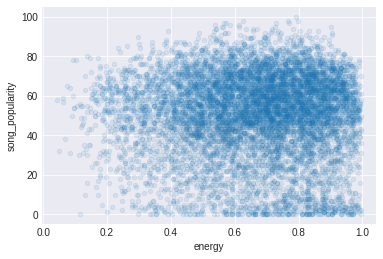

In [ ]:
df.plot(kind="scatter", x="energy", y="song_popularity",
alpha=0.1)

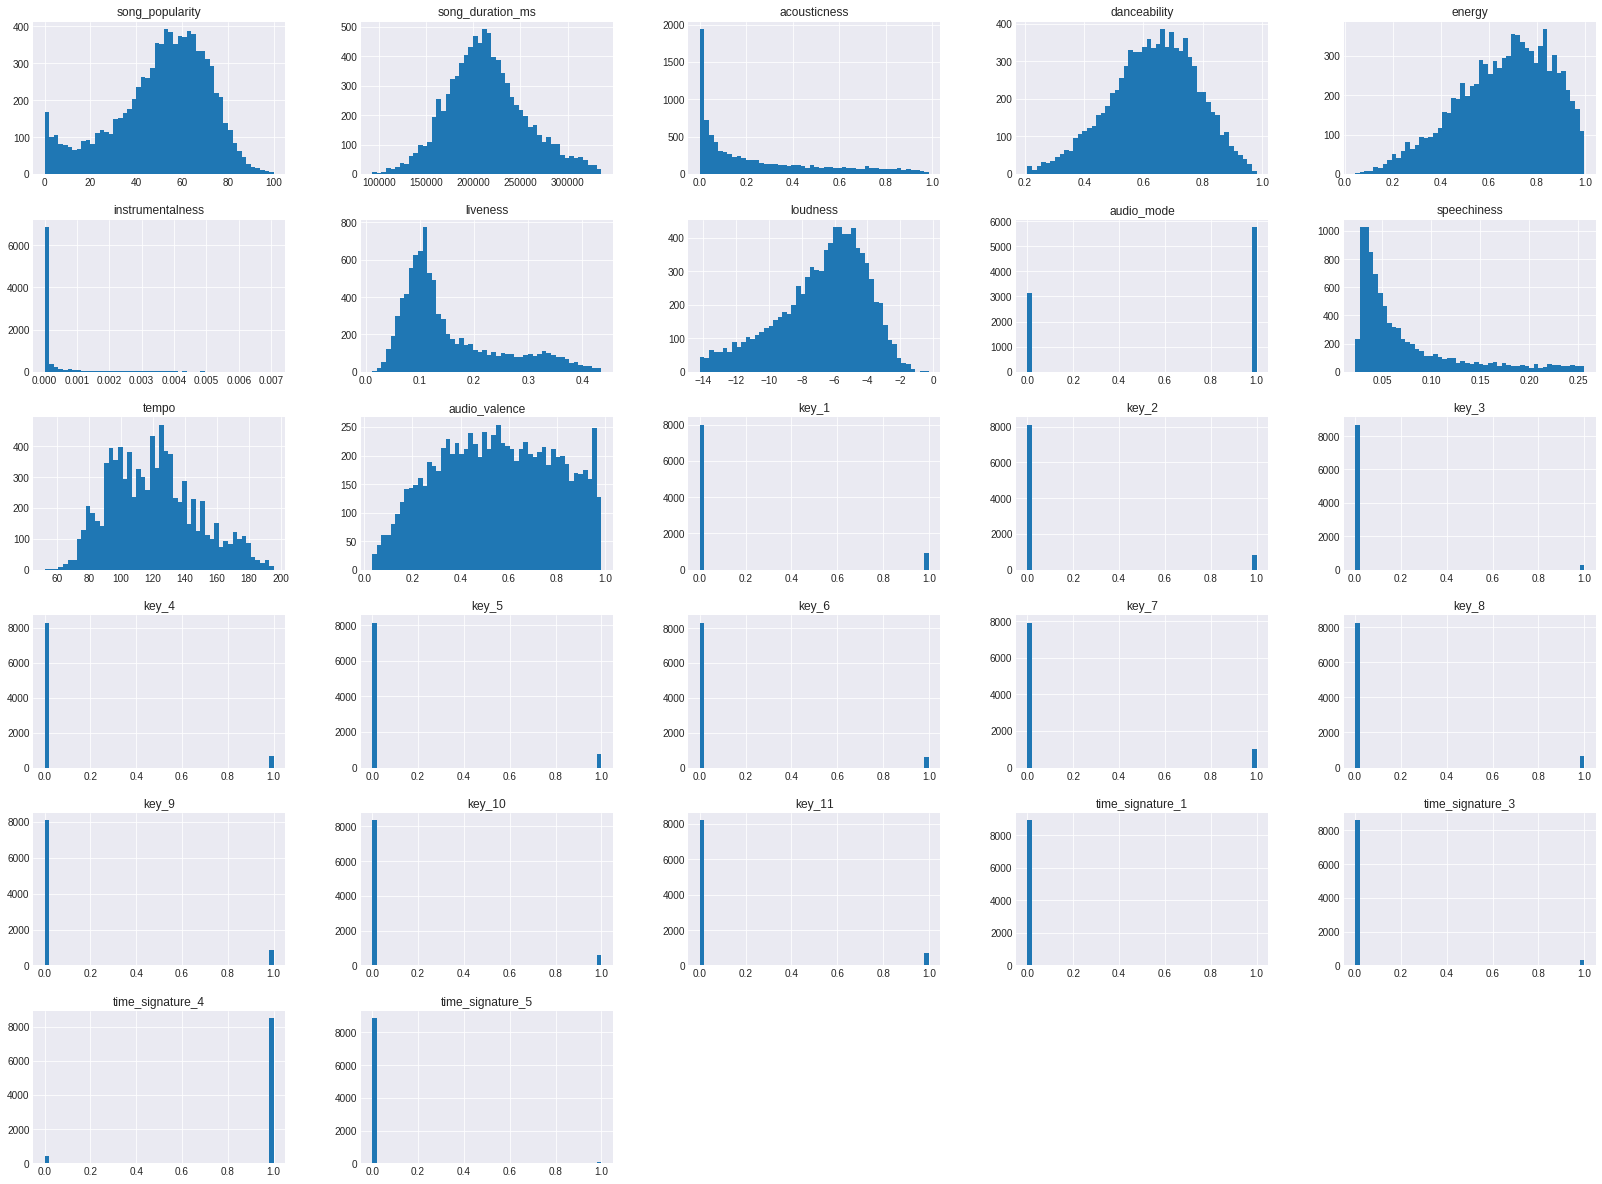

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(28,21))
plt.show()

In [ ]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train, test = split_train_test(df, 0.3)
len(train),len(test)

(6251, 2679)

In [ ]:
train_labels = train["song_popularity"].copy()
train = train.drop("song_popularity", axis=1)
test_labels = test["song_popularity"].copy()
test = test.drop("song_popularity", axis=1)

In [ ]:
from zlib import DEF_BUF_SIZE
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
imputer = SimpleImputer(strategy="median")
imputer.fit(train)
X = imputer.transform(train)
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
train = num_pipeline.fit_transform(train)

In [ ]:
train.shape

(6251, 26)

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
from sklearn.model_selection import cross_val_score


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train, train_labels)
train_predictions = lin_reg.predict(train)
lin_mse = mean_squared_error(train_labels, train_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

20.135778489532772

In [ ]:
scores = cross_val_score(lin_reg, train, train_labels,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [20.43393892 20.30366136 20.82271079 20.12157677 19.76384508 19.94346073
 20.14156049 20.24941273 20.86701517 19.58498244]
Mean: 20.223216450316023
Standard deviation: 0.39230831421947865


In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(train, train_labels)
train_predictions=ridge_reg.predict(train)
reg_mse = mean_squared_error(train_labels, train_predictions)
reg_rmse = np.sqrt(lin_mse)
reg_rmse


20.135778489532772

In [ ]:
scores = cross_val_score(ridge_reg, train, train_labels,
scoring="neg_mean_squared_error", cv=10)
ridge_reg_rmse_scores = np.sqrt(-scores)
display_scores(ridge_reg_rmse_scores)

Scores: [20.43228471 20.30272549 20.82282398 20.12165789 19.76369144 19.94363591
 20.14263201 20.2498109  20.8671884  19.58493032]
Mean: 20.22313810573049
Standard deviation: 0.39223885126652136


In [ ]:
imputer = SimpleImputer(strategy="median")
imputer.fit(test)
X = imputer.transform(train)
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
test = num_pipeline.fit_transform(test)


lin_reg.fit(test, test_labels)
Final_predictions=lin_reg.predict(test).reshape(-1,1)
Final_mse = mean_squared_error(test_labels, Final_predictions)
Final_rmse = np.sqrt(Final_mse)
Final_rmse



20.698282070253207

In [ ]:
submission=pd.DataFrame(Final_predictions)
submission.to_csv('Submission.csv')

In [ ]:
# x=train['song_popularity'].values
# y=train['song_duration_ms'].values 
# mean_x=np.mean(x)
# mean_y=np.mean(y)
# m=len(x)
# n1=0
# n2=0
# for i in range(m):
#   n1+=(x[i]-mean_x)*(y[i]-mean_y)
#   n2+=(x[i]-mean_x)**2
# b1=n1/n2
# b0=mean_y-(b1*mean_x)
# #print(b1,b0)

In [ ]:
# x=train['song_popularity'].values  
# y=train['song_duration_ms'].values 
# max_x=np.max(x)+100
# min_x=np.min(x)-100
# x0=np.linspace(min_x,max_x,1000)
# y0=b0+b1*x0
# plt.plot(x0,y0,color='black',label='regreession Line')
# plt.scatter(x,y,c='red',label='scatter plot')
# plt.xlabel('song_popularity')
# plt.ylabel('song_duration_ms')
# plt.legend()
# plt.show()

In [ ]:
# ss_t=0
# ss_r=0
# for i in range(m):
#   y_pred=b0+b1*x[i]
#   ss_t+=(y[i]-mean_y)**2
#   ss_r+=(y[i]-y_pred)**2
# r2=1-(ss_r/ss_t)
# print(r2)